# US Visa Prediction Project

**Life cycle of Machine Learning Project**
- Understanding the Problem Statement
- Data Collection
- Exploratry data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

# About

The Immigration and Nationality Act(INA) of the US permits foreign workers to come to the United States to work on eighter a temporary basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigation programs are administered  by the Office of Foreign Labor Certification(OFLC).

# 1) Problem Statement

- OFLC gives job certifications for employers seeking to bring foreign workers into the United and grants certifications.
- As in last year the count of employees were huge so OFLC needs machine learning models to short list visa applicants based on their  previous data.

# 2) Data Collection

- The dataset is part of OFLC
- The data consists of 25480 Rows and 12 Columns 

data source : https://www.kaggle.com/datasets/moro23/easyvisa-dataset/data

### 2.1) Import Data and Required Packeges 

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Import the CSV data as DataFrame


In [23]:
df = pd.read_csv(r"EasyVisa.csv")

Show top five rows

In [24]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Shape of the dataset

In [25]:
df.shape

(25480, 12)

Summary of the dataset

In [26]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Check Datatype and Null values in the dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# 3) Exploring Data

In [28]:
# Defining numerical and categorical data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] 

# printing features
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [29]:
#proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------------------------------')

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------

**Insights**
- `case_id` have unique values for each column which can be dropped as it is of no importance
- `continent` column is highly biased towards asia, hance we can combine other categories to form a single category.
- `unit_of_wage` seems to be an important column as most of them are yearly contracts.

# Univariate Analysis

Univariate analysis term refers to the analysis of single variable. The perpose of univariate analysis is to understand the destribution of values for a single variable.

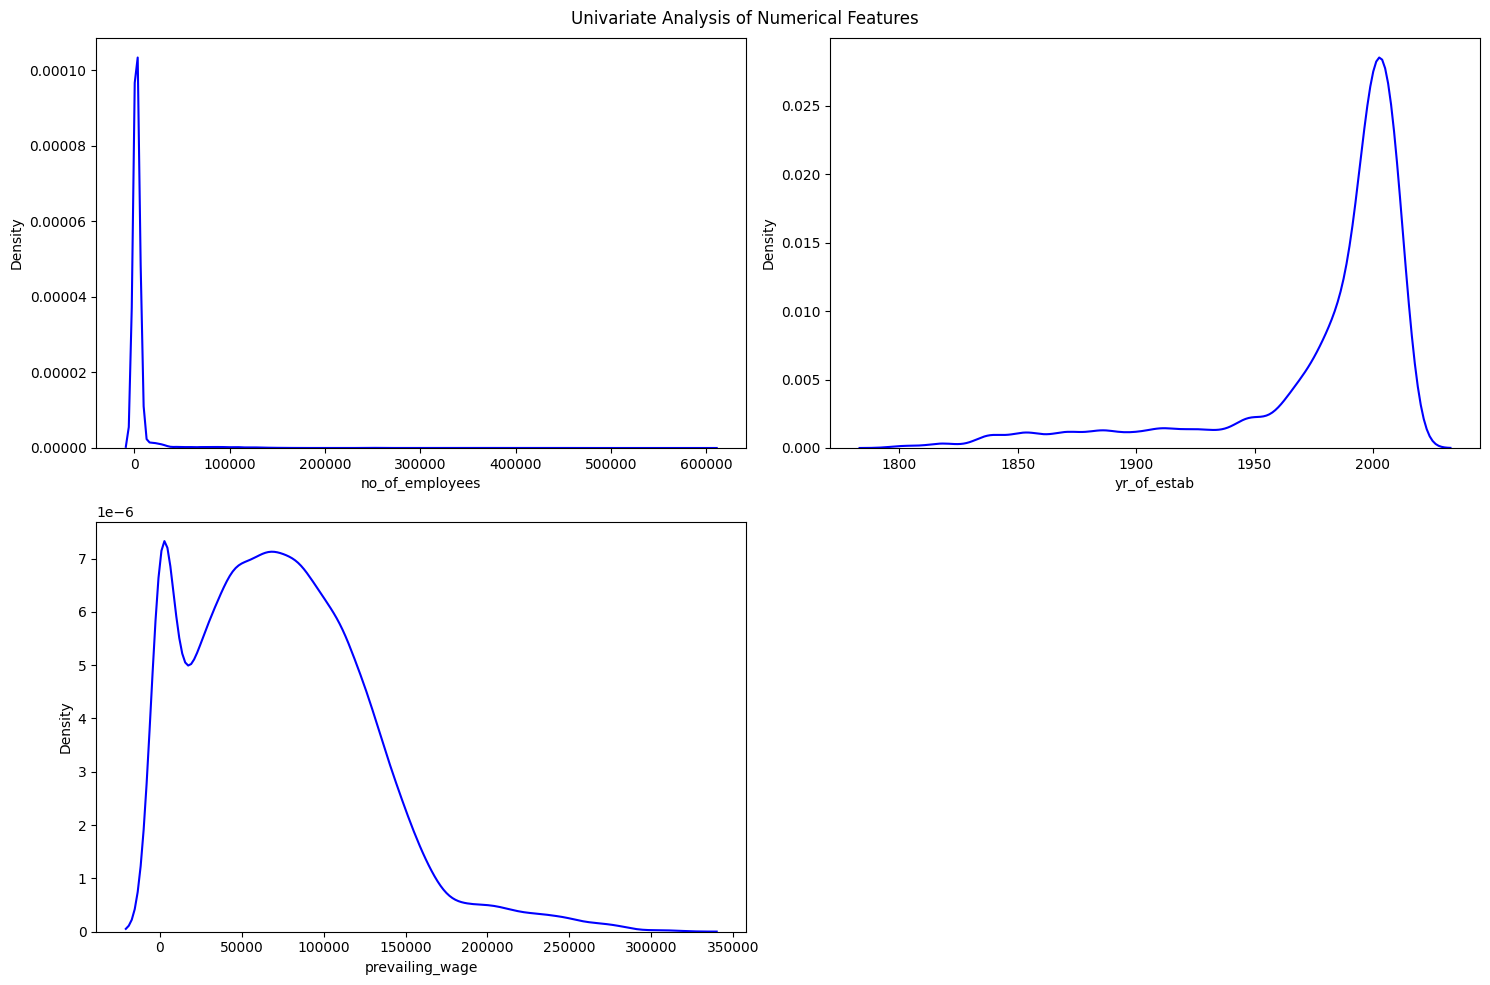

In [30]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features')

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Insights**
- `no_of_employees` column looks more skewed but it may be because of outliers.
- `yr_of_estab` is a descrite feature
- `prevailing_wage` is a right skewed distribution.

## Categorical Features

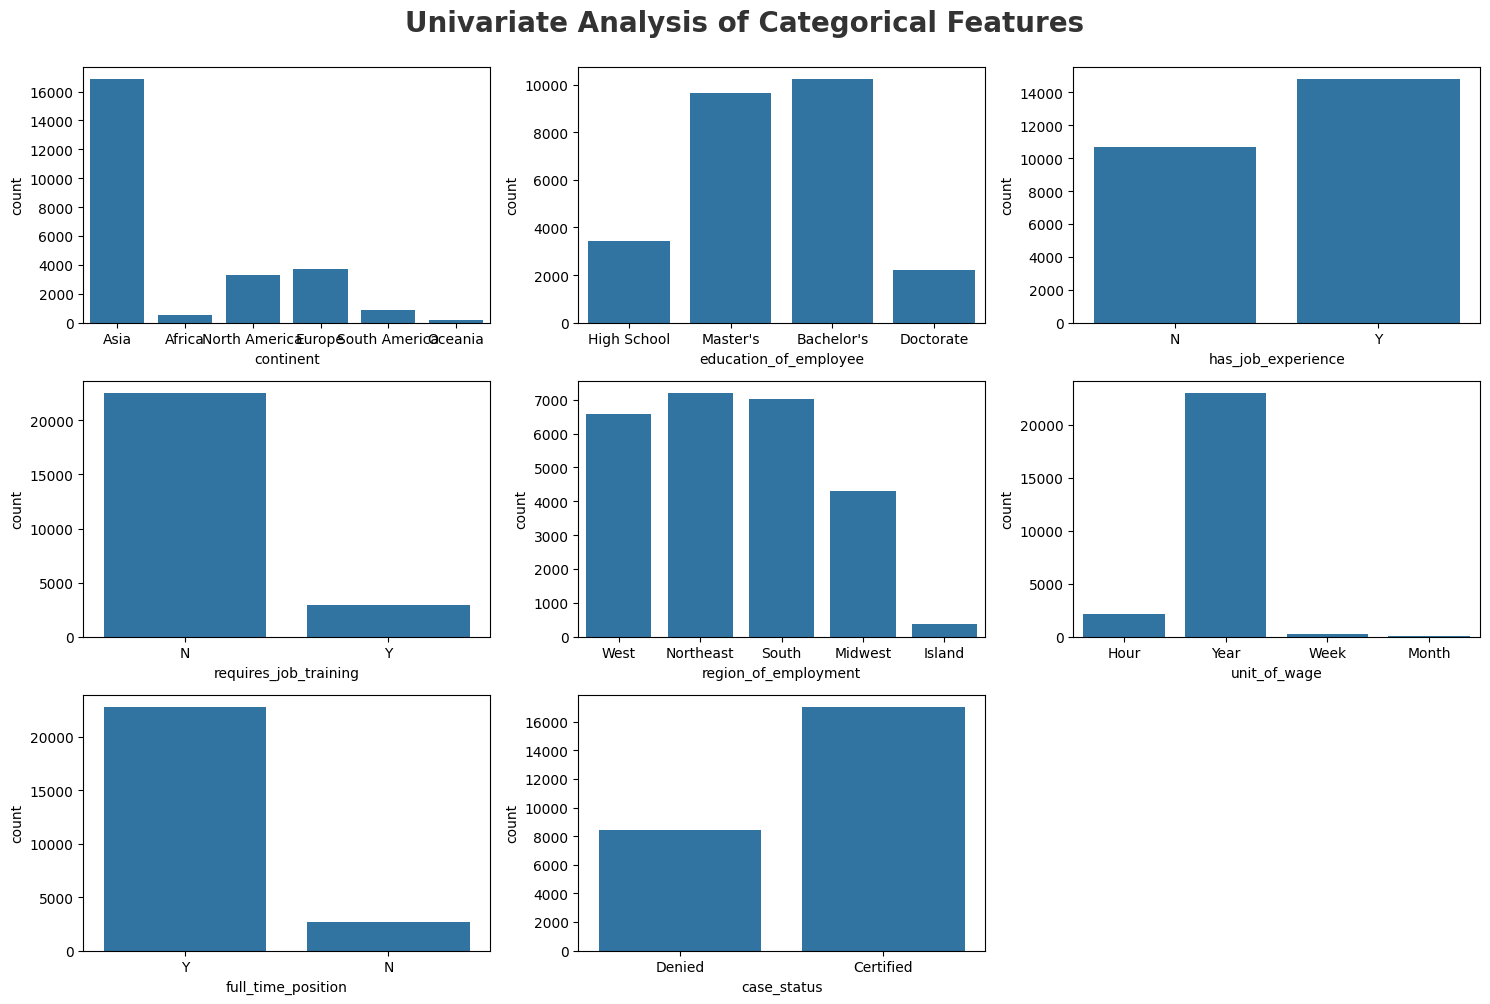

In [31]:
# categorical columns
categorical_features.remove('case_id')

plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

**Insights**
- `continent`, `requires_job_training`, `unit_of_wage`, and `full_time_position` columns has single column dominationg
- In rest of the columns data is balanced

# Multivariate Analysis

- Multivariate analysis is the analysis of more then one variable
- checking the relationship between variables

In [34]:
# lets devide numerical features into continuous and descrete varables
continuous_features = [feature for feature in numeric_features if df[feature].nunique()>30]
descreate_features = [feature for feature in numeric_features if df[feature].nunique()<=30]

#print
print("We have {} continuous features: {}".format(len(continuous_features), continuous_features))
print("\nWe have {} descreate features: {}".format(len(descreate_features), descreate_features))

We have 3 continuous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 0 descreate features: []


In [35]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Insights**
- There is no multicollinearity beetween any variables

### Check the correlation of categorical features to target variable (case_status)

We are going to do Hypothesis testing to check weather the feature are correlated with target varable or not.
- Chi-squared test is statistical hypothesis test that is valid  to perform when the test statistic i chi-squred distributed under the null hypothesis, specifically Person's chi-squared test
- chi-squared statistic is one way to show a relationship between two categorical variables
- Here we are test corrrelation of Categorical features with Target variable i.e. case_status

*Null Hypothesis($H_0$): The feature is independent of target variable (No-correlation)*

*Alternative Hypothesis($H_1$): The featre is dependent on target variable (Correlated)*

In [ ]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.5:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

